In [1]:
import numpy as np
import torch as th
import glob
from PIL import Image
import matplotlib.pyplot as plt
import cv2

def create_image_grid(images, n_rows=1, text_labels=[]):
    """
    Creates a grid of images from a list of NumPy arrays.
    
    Parameters:
    - images: List of np.array, each representing an image.
    - n_rows: Number of rows in the grid.
    
    Returns:
    - A matplotlib figure containing the image grid.
    """
    n_images = len(images)
    n_cols = (n_images + n_rows - 1) // n_rows  # Calculate number of columns needed
    
    # Get the height and width of the images (assuming all images are the same size)
    # img_height, img_width = images[0].shape[:2]

    # Add zero images if the number of images is less than needed to fill the grid
    images += [np.zeros_like(images[0]) for _ in range(n_rows * n_cols - n_images)]
    
    # Create the grid by concatenating images
    rows = []
    for i in range(n_rows):
        row_images = images[i * n_cols:(i + 1) * n_cols]
        rows.append(np.concatenate(row_images, axis=1))
    
    grid_image = np.concatenate(rows, axis=0)

    # Add text labels to the grid
    img_height, img_width = images[0].shape[:2]
    for i, text_label in enumerate(text_labels):
        # plt.text((i % n_cols) * img_width, (i // n_cols) * img_height, text_label, color='red', fontsize=12)
        if isinstance(text_label, str):
            plt.text((i % n_cols) * img_width, -2, text_label, color='red', fontsize=20)
        else:
            plt.text((i % n_cols) * img_width, -2, f'{float(text_label):.5f}', color='red', fontsize=20)

    return grid_image

def face_segment(segment_part, img):
    
    if isinstance(img, Image.Image):
        face_segment_anno = np.array(img)
    else:
        face_segment_anno = img
        
    bg = (face_segment_anno == 0)
    skin = (face_segment_anno == 1)
    l_brow = (face_segment_anno == 2)
    r_brow = (face_segment_anno == 3)
    l_eye = (face_segment_anno == 4)
    r_eye = (face_segment_anno == 5)
    eye_g = (face_segment_anno == 6)
    l_ear = (face_segment_anno == 7)
    r_ear = (face_segment_anno == 8)
    ear_r = (face_segment_anno == 9)
    nose = (face_segment_anno == 10)
    mouth = (face_segment_anno == 11)
    u_lip = (face_segment_anno == 12)
    l_lip = (face_segment_anno == 13)
    neck = (face_segment_anno == 14)
    neck_l = (face_segment_anno == 15)
    cloth = (face_segment_anno == 16)
    hair = (face_segment_anno == 17)
    hat = (face_segment_anno == 18)
    face = np.logical_or.reduce((skin, l_brow, r_brow, l_eye, r_eye, eye_g, l_ear, r_ear, ear_r, nose, mouth, u_lip, l_lip))

    if segment_part == 'faceseg_face':
        seg_m = face
    elif segment_part == 'faceseg_head':
        seg_m = (face | neck | hair)
    elif segment_part == 'faceseg_nohead':
        seg_m = ~(face | neck | hair)
    elif segment_part == 'faceseg_face&hair':
        seg_m = ~bg
    elif segment_part == 'faceseg_bg_noface&nohair':
        seg_m = (bg | hat | neck | neck_l | cloth) 
    elif segment_part == 'faceseg_bg&ears_noface&nohair':
        seg_m = (bg | hat | neck | neck_l | cloth) | (l_ear | r_ear | ear_r)
    elif segment_part == 'faceseg_bg':
        seg_m = bg
    elif segment_part == 'faceseg_bg&noface':
        seg_m = (bg | hair | hat | neck | neck_l | cloth)
    elif segment_part == 'faceseg_hair':
        seg_m = hair
    elif segment_part == 'faceseg_faceskin':
        seg_m = skin
    elif segment_part == 'faceseg_faceskin&nose':
        seg_m = (skin | nose)
    elif segment_part == 'faceseg_faceskin&nose&mouth&eyebrows':
        seg_m = (skin | nose | mouth | u_lip | l_lip | l_brow | r_brow | l_eye | r_eye)
    elif segment_part == 'faceseg_faceskin&nose&mouth&eyebrows&eyes&glasses':
        seg_m = (skin | nose | mouth | u_lip | l_lip | l_brow | r_brow | l_eye | r_eye | eye_g)
        # seg_m = (skin | nose | mouth | u_lip | l_lip | l_brow | r_brow)
    elif segment_part == 'faceseg_face_noglasses':
        seg_m = (~eye_g & face)
    elif segment_part == 'faceseg_face_noglasses_noeyes':
        seg_m = (~(l_eye | r_eye) & ~eye_g & face)
    elif segment_part == 'faceseg_eyes&glasses':
        seg_m = (l_eye | r_eye | eye_g)
    elif segment_part == 'glasses':
        seg_m = eye_g
    elif segment_part == 'faceseg_eyes':
        seg_m = (l_eye | r_eye)
    # elif (segment_part == 'sobel_bg_mask') or (segment_part == 'laplacian_bg_mask') or (segment_part == 'sobel_bin_bg_mask'):
    elif segment_part in ['sobel_bg_mask', 'laplacian_bg_mask', 'sobel_bin_bg_mask']:
        seg_m = ~(face | neck | hair)
    elif segment_part in ['canny_edge_bg_mask']:
        seg_m = ~(face | neck | hair) | (l_ear | r_ear)
    else: raise NotImplementedError(f"Segment part: {segment_part} is not found!")
    
    out = seg_m
    return out

1.169307 0.0 (256, 256, 3)
True False (256, 256, 3)
True False (256, 256, 3)


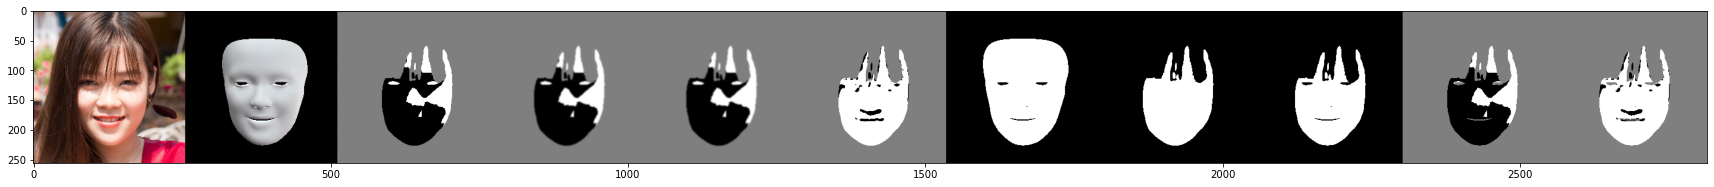

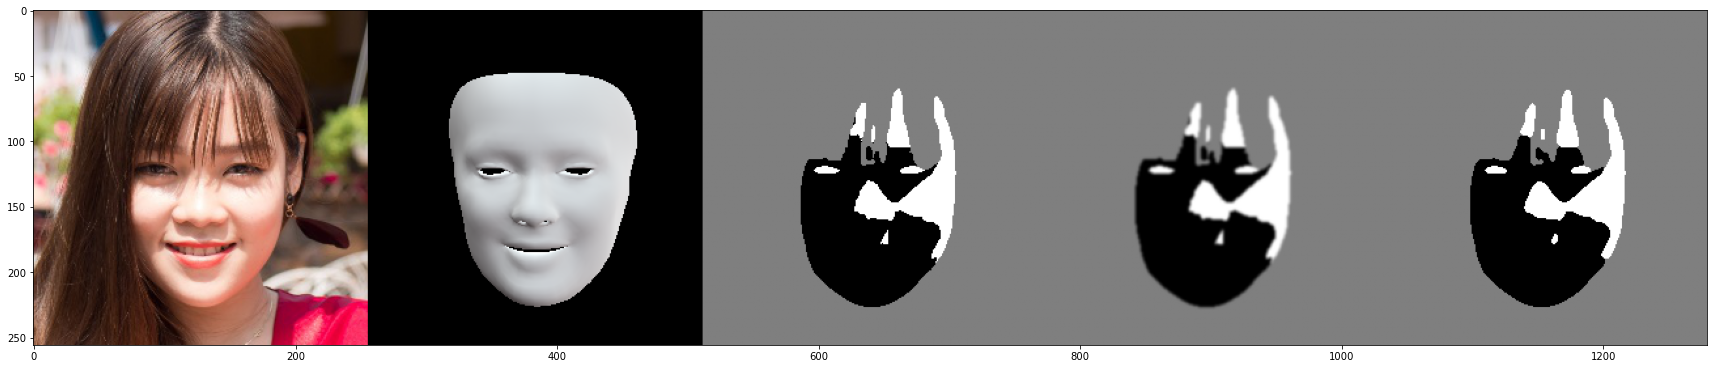

0.8450445 0.0 (256, 256, 3)
True False (256, 256, 3)
True False (256, 256, 3)


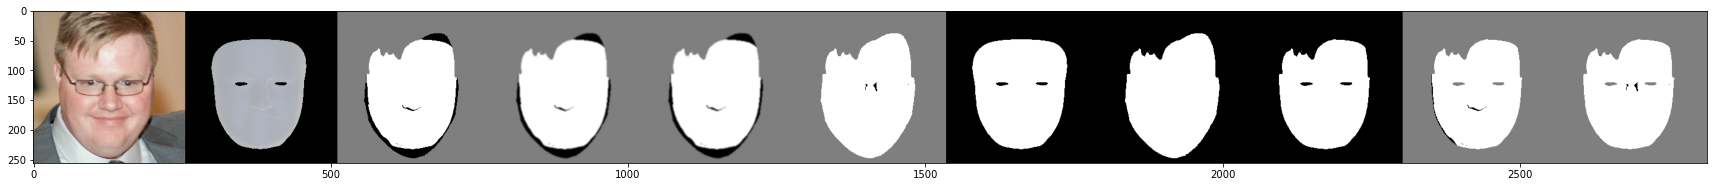

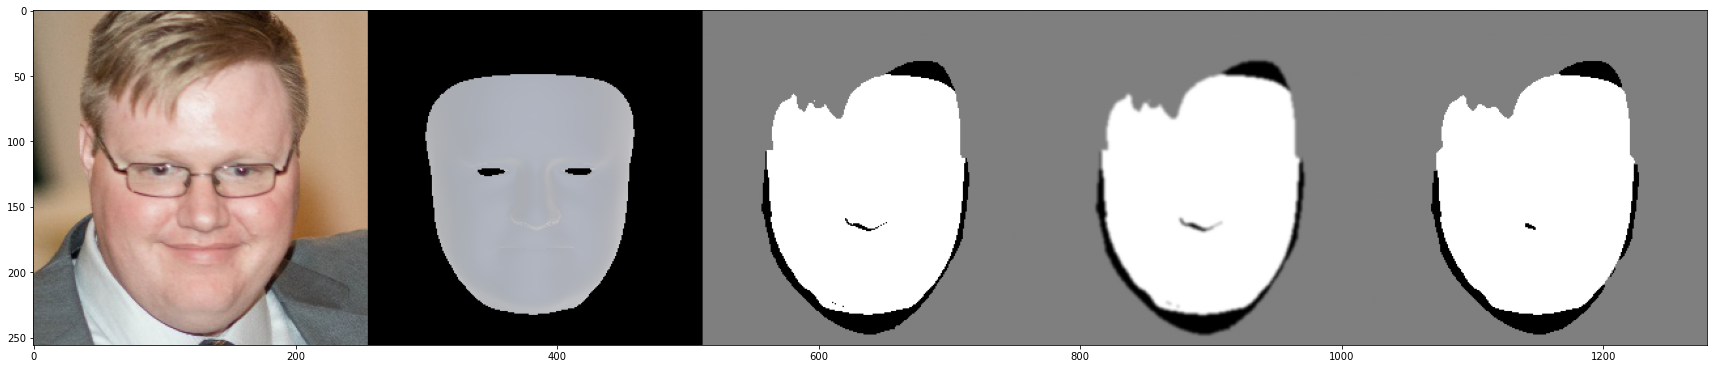

0.9965124 0.0 (256, 256, 3)
True False (256, 256, 3)
True False (256, 256, 3)


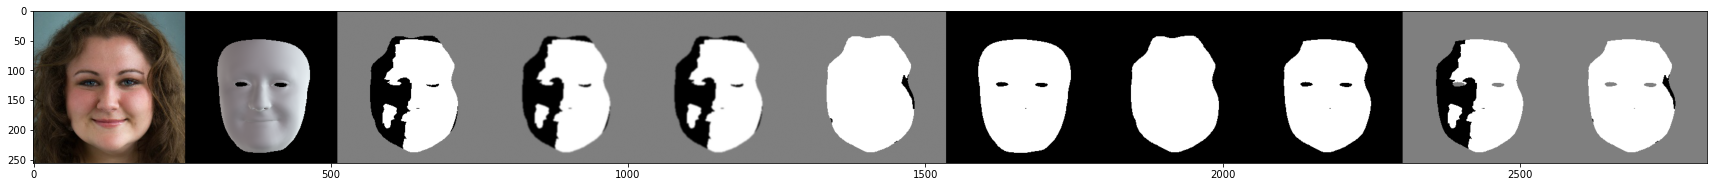

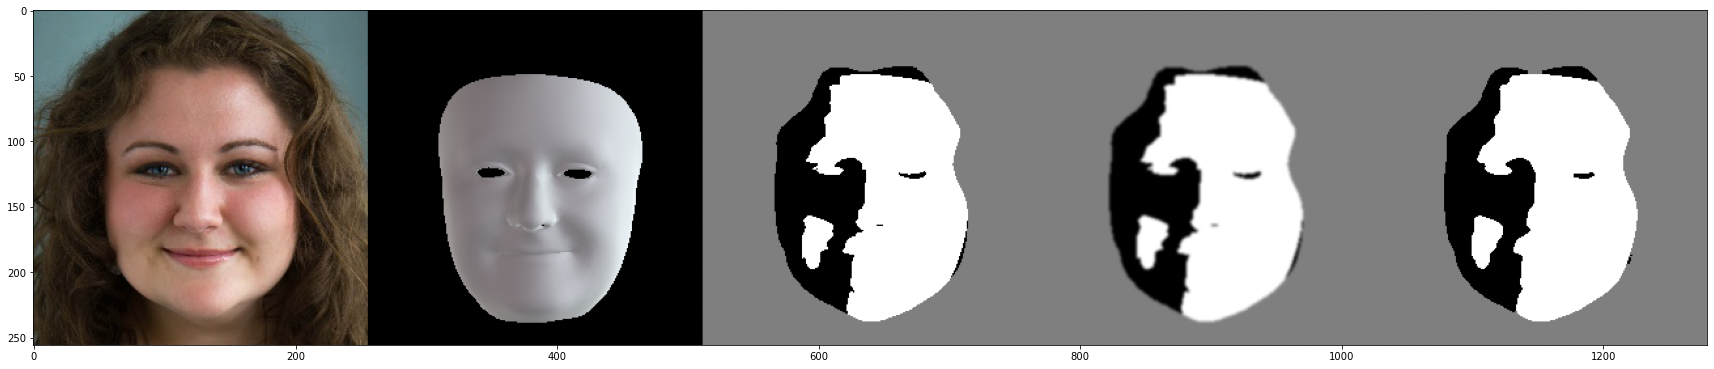

0.87936103 0.0 (256, 256, 3)
True False (256, 256, 3)
True False (256, 256, 3)


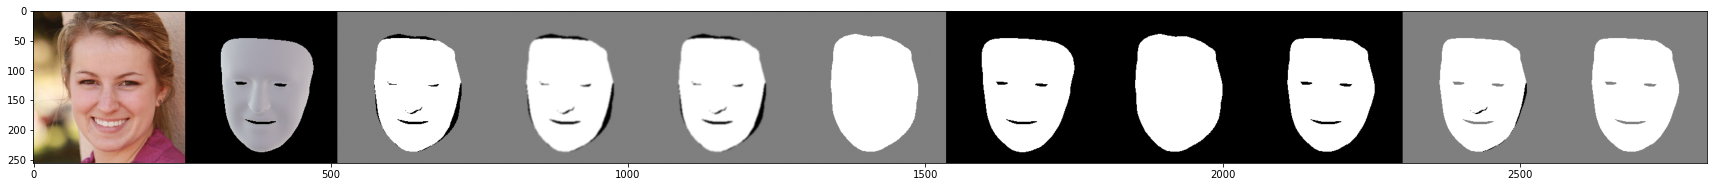

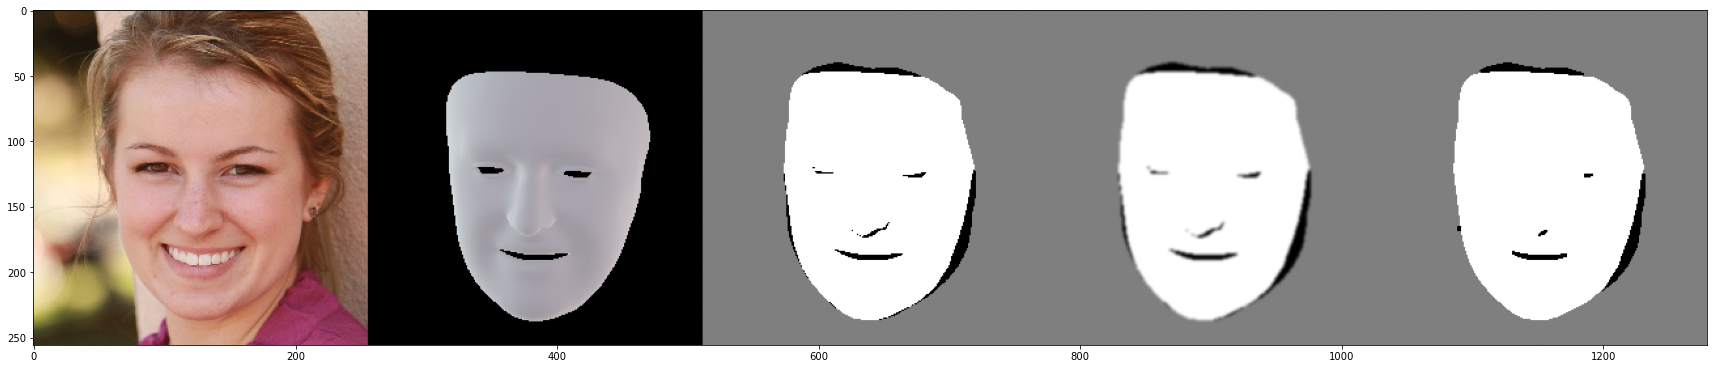

0.95969963 0.0 (256, 256, 3)
True False (256, 256, 3)
True False (256, 256, 3)


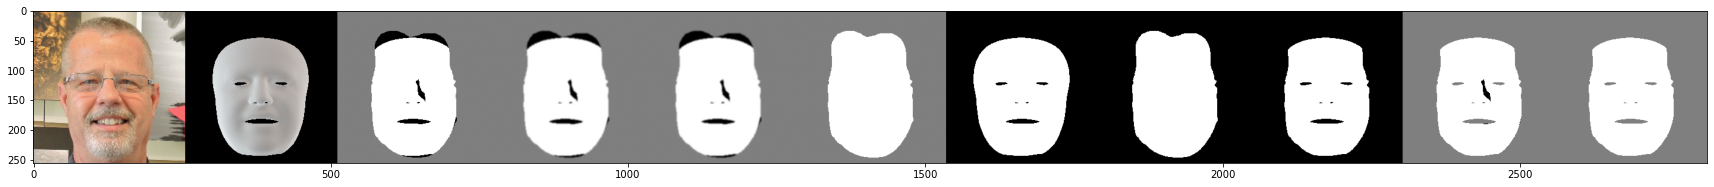

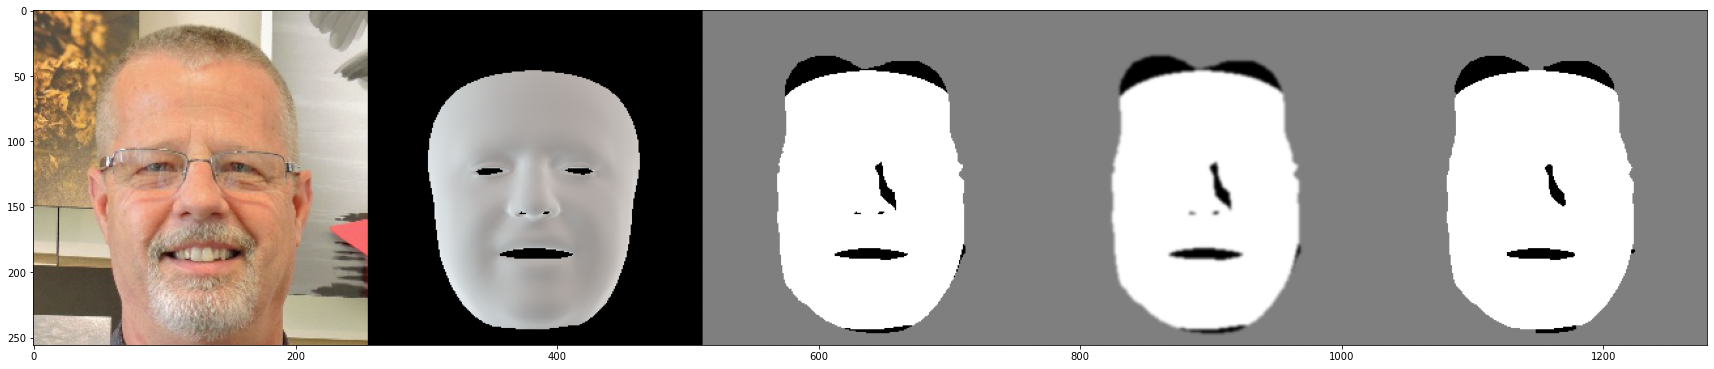

0.7948591 0.0 (256, 256, 3)
True False (256, 256, 3)
True False (256, 256, 3)


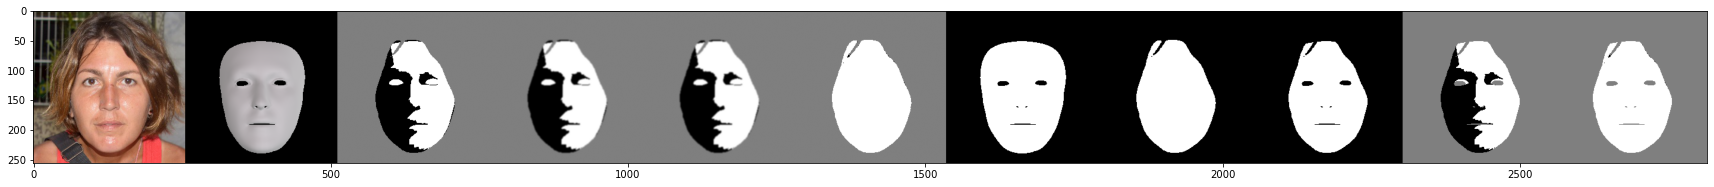

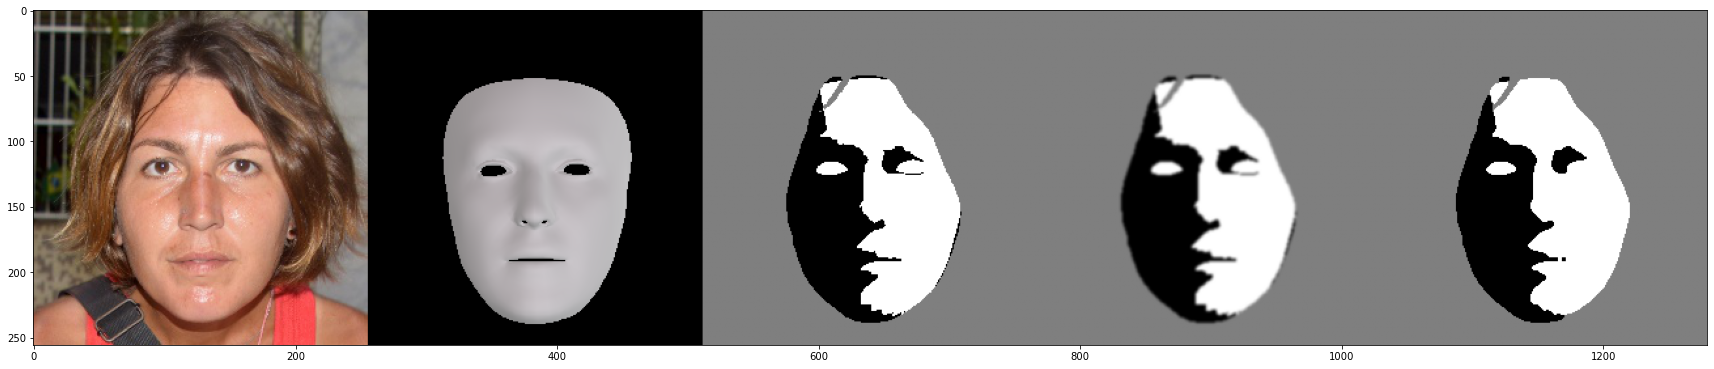

0.7478464 0.0 (256, 256, 3)
True False (256, 256, 3)
True False (256, 256, 3)


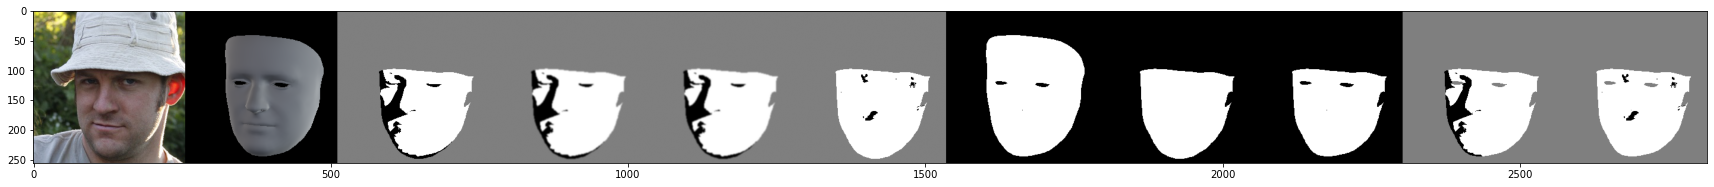

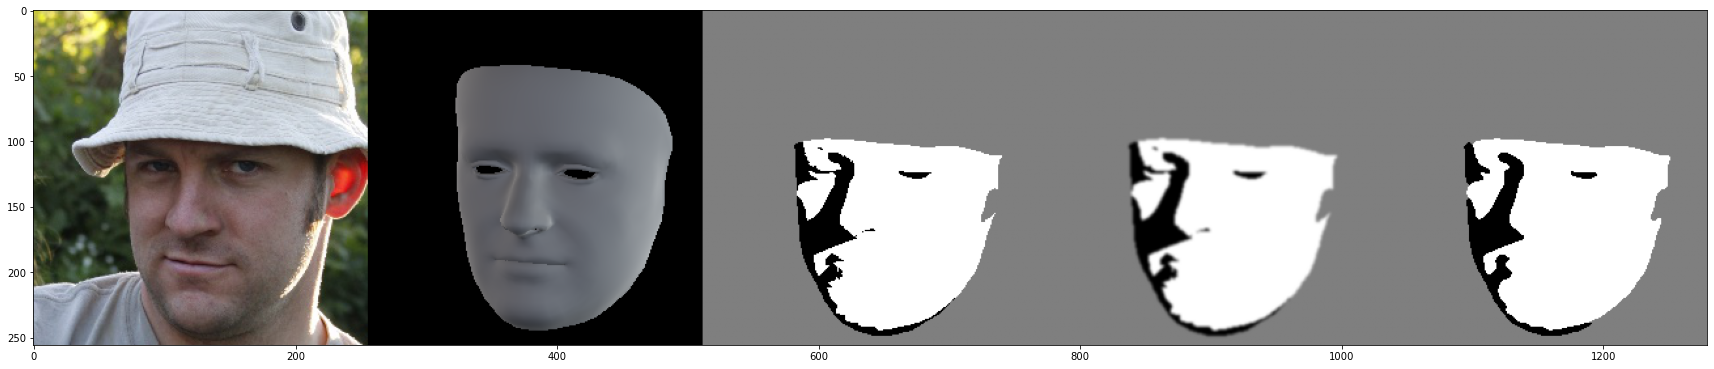

0.97396654 0.0 (256, 256, 3)
True False (256, 256, 3)
True False (256, 256, 3)


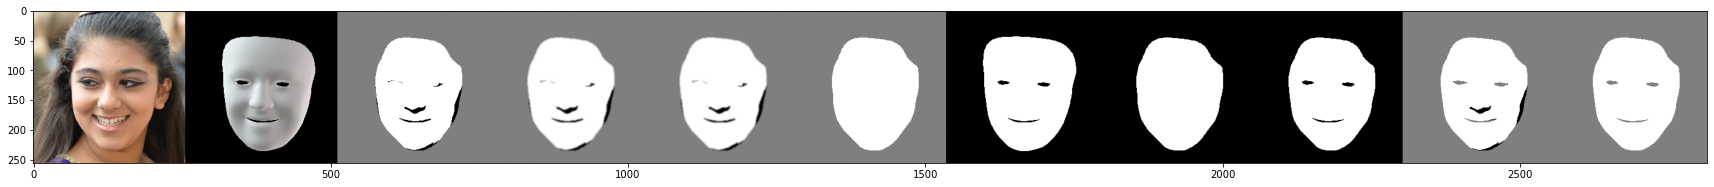

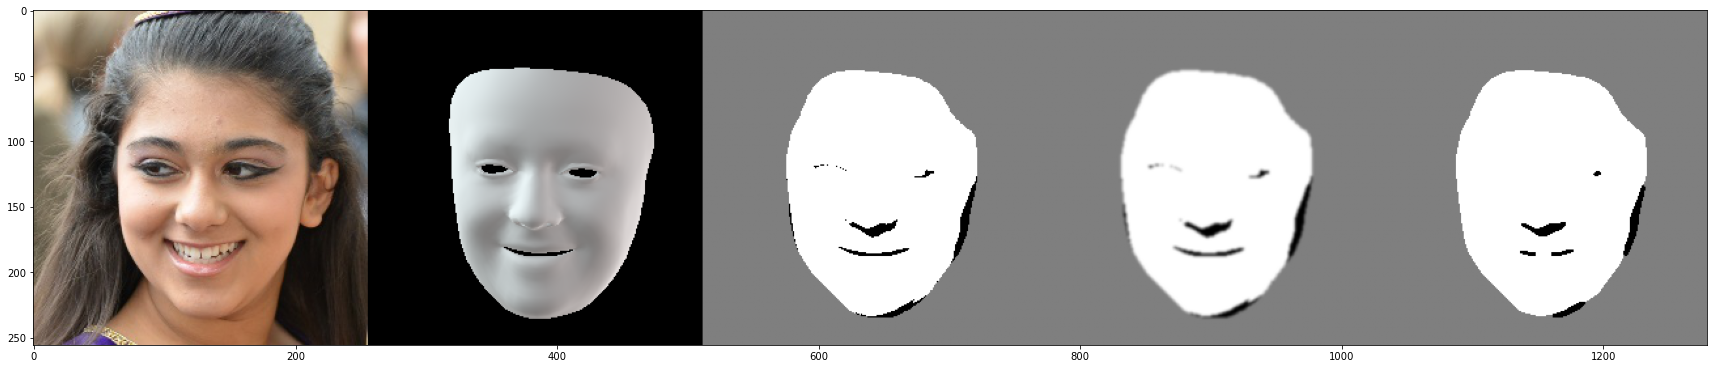

0.7274663 0.0 (256, 256, 3)
True False (256, 256, 3)
True False (256, 256, 3)


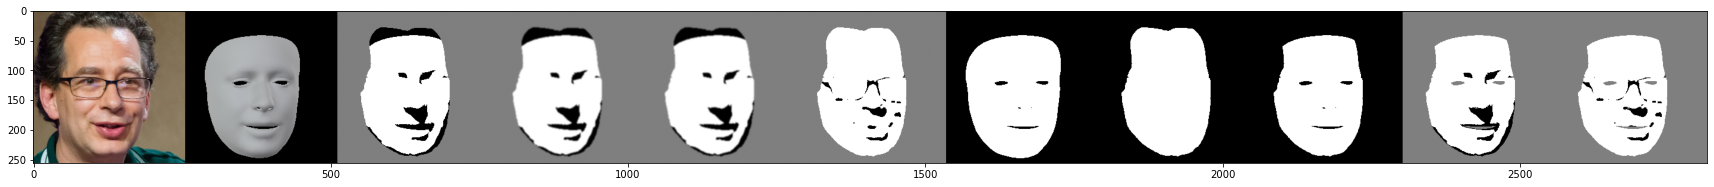

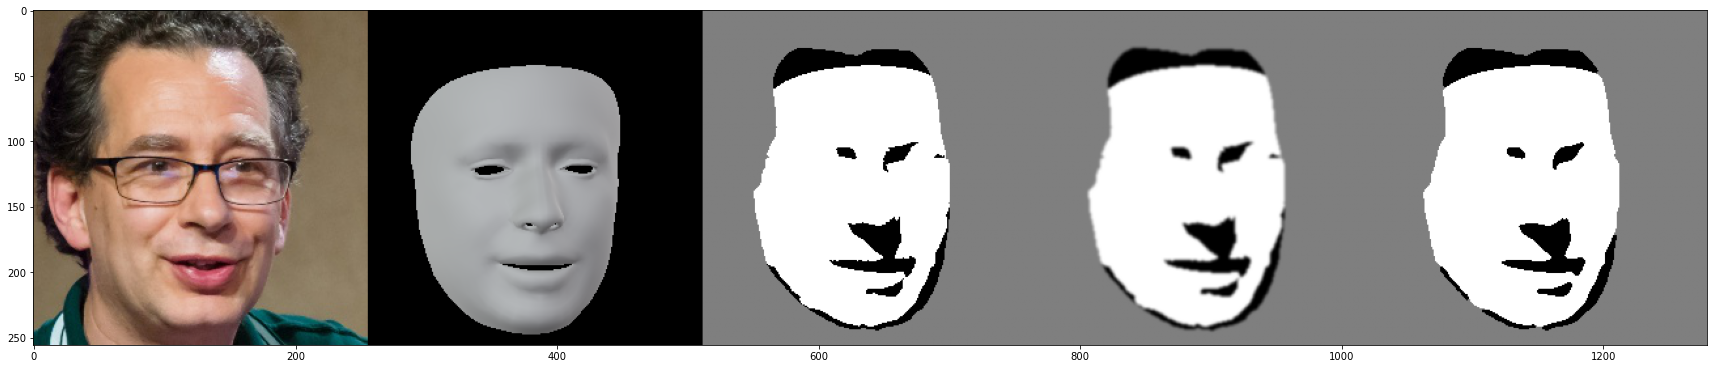

1.03822 0.0 (256, 256, 3)
True False (256, 256, 3)
True False (256, 256, 3)


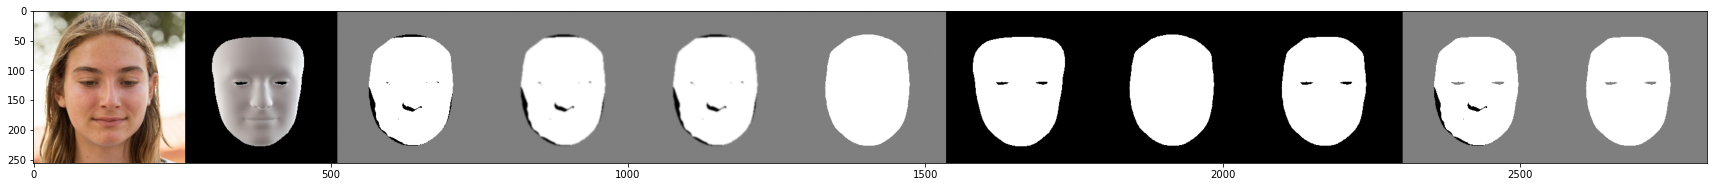

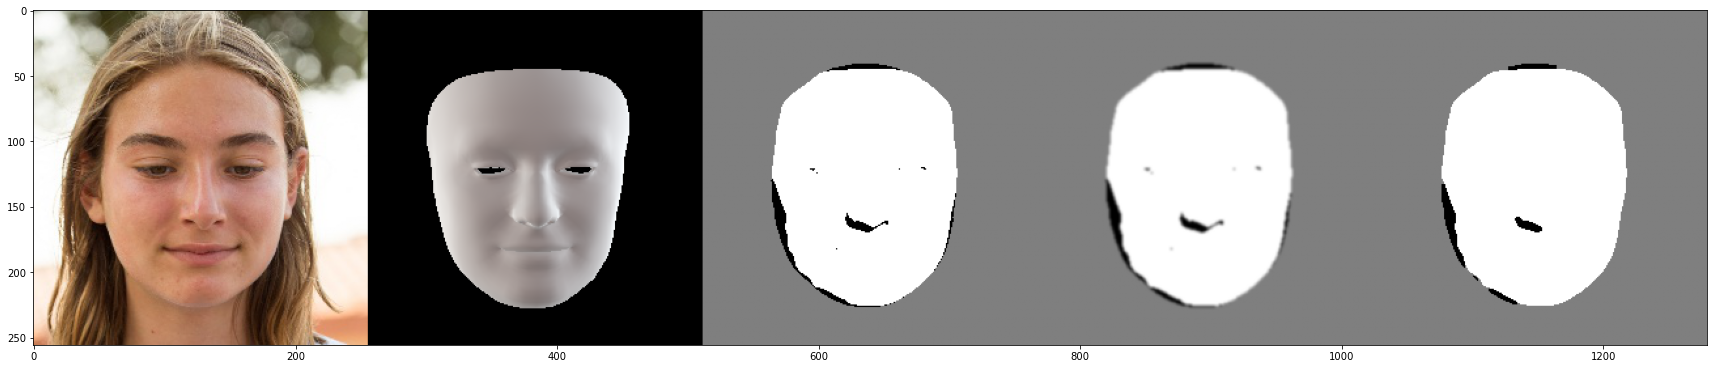

0.7975994 0.0 (256, 256, 3)
True False (256, 256, 3)
True False (256, 256, 3)


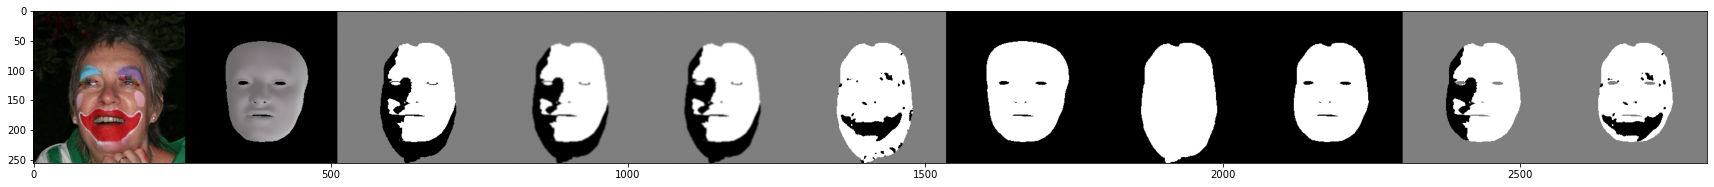

In [46]:
path = '/data/mint/DPM_Dataset/ffhq_256_with_anno/rendered_images/deca_masked_face_images_woclip/train/'
imgs = glob.glob(path + '*.npy')

def vis_mask(pth):
    img_name = pth.split('/')[-1].split('.')[0]

    face = Image.open(f'/data/mint/DPM_Dataset/ffhq_256_with_anno/ffhq_256/train/{img_name}.jpg')
    face = np.array(face) / 255.0

    faceseg_path = '/data/mint/DPM_Dataset/ffhq_256_with_anno/face_segment/train/anno/'

    faceseg = f'{faceseg_path}/anno_{img_name}.png'
    faceseg_img = Image.open(faceseg) 
    faceseg_face = face_segment('faceseg_faceskin&nose&mouth&eyebrows&eyes&glasses', faceseg_img)
    faceseg_face = np.repeat(faceseg_face.astype(np.float32)[..., None], 3, axis=-1)

    sm_forvis = '/data/mint/DPM_Dataset/ffhq_256_with_anno/shadow_masks_t5e-1_forvis/train/'
    sm = f'{sm_forvis}/{img_name}.png'
    sm_img = Image.open(sm)
    sm_img = np.array(sm_img) / 255.0
    sm_img = np.repeat(sm_img[..., None], 3, axis=-1)

    median = '/data/mint/DPM_Dataset/ffhq_256_with_anno/shadow_diff/median5_5e-2/train/'
    md = f'{median}/{img_name}.png'
    md_img = Image.open(md)
    md_img = np.array(md_img) / 255.0
    md_img = np.repeat(md_img[..., None], 3, axis=-1)

    rend = np.load(pth, allow_pickle=True)
    print(np.max(rend), np.min(rend), rend.shape)
    rend = rend.clip(0, 1)
    rend_mask = rend > 0.0

    intr_mask = np.logical_and(rend_mask, faceseg_face)
    # print("S", (cv2.floodFill((intr_mask*255).astype(np.uint8), None, (0, 0), 255)[1]/255.0).shape)
    print(np.max(intr_mask), np.min(intr_mask), intr_mask.shape)
    print(np.max(rend_mask), np.min(rend_mask), rend_mask.shape)

    plt.figure(figsize=(30, 30))
    plt.imshow(create_image_grid([
        face,
        rend, 
        sm_img,
        cv2.GaussianBlur(sm_img, (5, 5), 0),
        cv2.GaussianBlur(cv2.resize(sm_img, (256, 256)), (5, 5), 0),
        md_img,
        rend_mask,
        faceseg_face,
        intr_mask,
        # np.logical_and(np.logical_and(rend_mask, faceseg_face), np.logical_or(rend_mask, faceseg_face)),
        # np.repeat((cv2.floodFill((rend_mask*255).astype(np.uint8), None, (0, 0), 255)[1]/255.0)[..., 0:1], 3, axis=-1),
        (sm_img * intr_mask) + ((0.5 * np.ones_like(sm_img)) * ~intr_mask),
        (md_img * intr_mask) + ((0.5 * np.ones_like(md_img)) * ~intr_mask),
    ]))
    plt.show()

    plt.figure(figsize=(30, 30))
    plt.imshow(create_image_grid([
        face,
        rend, 
        sm_img,
        cv2.GaussianBlur(sm_img, (5, 5), 0),
        # cv2.medianBlur(cv2.resize(sm_img, (256, 256)), (5, 5), 0),
        cv2.medianBlur((sm_img * 255).astype(np.uint8), 5)/255.,
    ]))
    plt.show()

for i, img in enumerate(imgs):
    vis_mask(img)
    if i == 10: break
